In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)


In [ ]:

df = pd.read_csv('consumo.csv', encoding='latin1')


df.head()


,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107.0,5.0,10,9
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107.0,0.0,10,9
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123.0,2.0,10,9
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123.0,2.0,10,9
4,FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.5,AUTOS COMPACTOS,24.00,21.90,23.01,17.26,135.0,5.0,9,9


In [14]:
print("Columnas originales:")
print(df.columns.tolist())

Columnas originales:
['Marca', 'Submarca', 'Versión', 'Modelo', 'Trans.', 'Comb.', 'Cilindros', 'Potencia (HP)', 'Tamaño (L)', 'Categoría', 'R. Ciudad (km/l)', 'R. Carr. (km/l)', 'R. Comb. (km/l)', 'R. Ajust. (km/l)', 'CO2(g/km)', 'NOx (g/1000km)', 'Calificación Gas Ef. Inv.', 'Calificación Contam. Aire']


In [15]:
import re
# Función para limpiar columnas
def clean_column(name):
    name = name.lower()
    name = name.strip()
    name = name.replace('á', 'a').replace('é', 'e').replace('í', 'i')
    name = name.replace('ó', 'o').replace('ú', 'u').replace('ñ', 'n')
    name = re.sub(r'[^\w\s]', '', name)  # elimina signos de puntuación
    name = re.sub(r'\s+', '_', name)     # reemplaza espacios por _
    return name

# Aplicar limpieza
df.columns = [clean_column(col) for col in df.columns]

# Mostrar columnas limpias
print("\nColumnas limpias:")
print(df.columns.tolist())



Columnas limpias:
['marca', 'submarca', 'version', 'modelo', 'trans', 'comb', 'cilindros', 'potencia_hp', 'tamano_l', 'categoria', 'r_ciudad_kml', 'r_carr_kml', 'r_comb_kml', 'r_ajust_kml', 'co2gkm', 'nox_g1000km', 'calificacion_gas_ef_inv', 'calificacion_contam_aire']


In [16]:
# Revisar tipos y valores nulos
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4617 non-null   object 
 1   submarca                  4617 non-null   object 
 2   version                   4617 non-null   object 
 3   modelo                    4617 non-null   int64  
 4   trans                     4601 non-null   object 
 5   comb                      4617 non-null   object 
 6   cilindros                 4617 non-null   int64  
 7   potencia_hp               4617 non-null   int64  
 8   tamano_l                  4617 non-null   float64
 9   categoria                 4617 non-null   object 
 10  r_ciudad_kml              4617 non-null   float64
 11  r_carr_kml                4617 non-null   float64
 12  r_comb_kml                4617 non-null   float64
 13  r_ajust_kml               4617 non-null   float64
 14  co2gkm  

marca                        0
submarca                     0
version                      0
modelo                       0
trans                       16
comb                         0
cilindros                    0
potencia_hp                  0
tamano_l                     0
categoria                    0
r_ciudad_kml                 0
r_carr_kml                   0
r_comb_kml                   0
r_ajust_kml                  0
co2gkm                       0
nox_g1000km                  0
calificacion_gas_ef_inv      0
calificacion_contam_aire     0
dtype: int64

In [17]:
df = df.dropna()  # eliminar filas con nulos


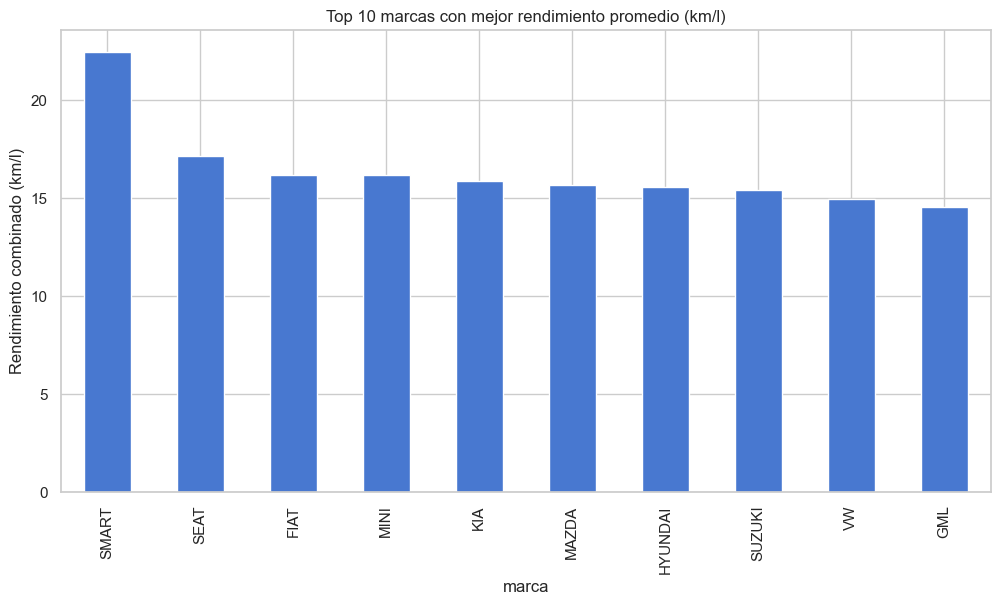

In [22]:
top_rendimiento = df.groupby('marca')['r_comb_kml'].mean().sort_values(ascending=False).head(10)
top_rendimiento.plot(kind='bar', title='Top 10 marcas con mejor rendimiento promedio (km/l)')
plt.ylabel('Rendimiento combinado (km/l)')
plt.show()


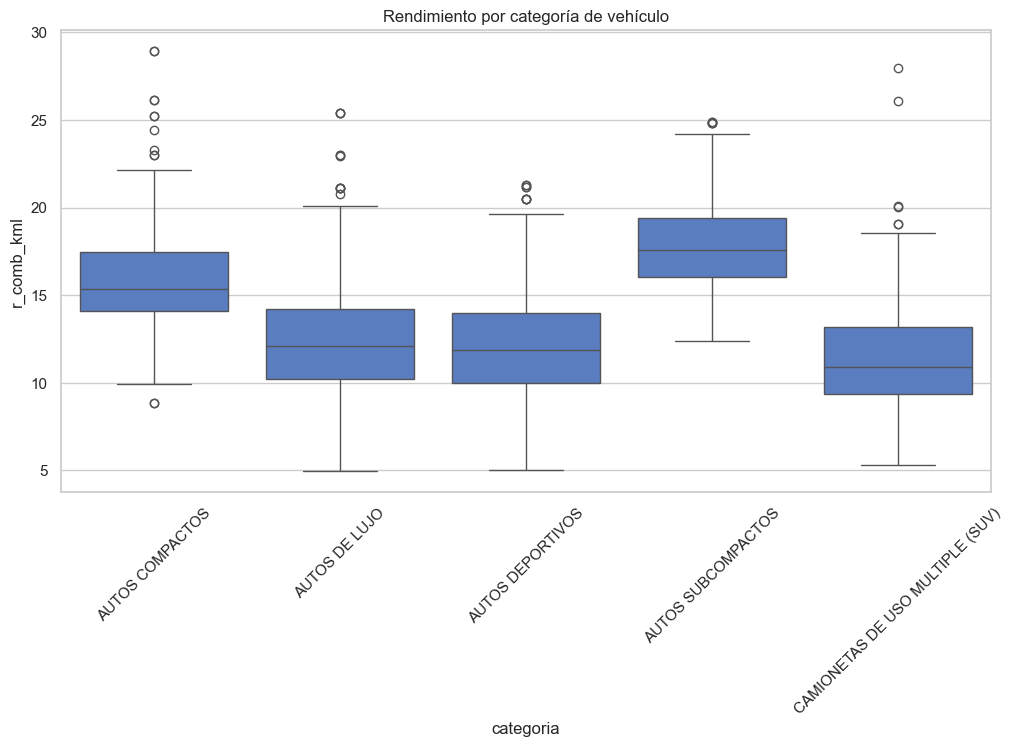

In [23]:
sns.boxplot(x='categoria', y='r_comb_kml', data=df)
plt.title('Rendimiento por categoría de vehículo')
plt.xticks(rotation=45)
plt.show()


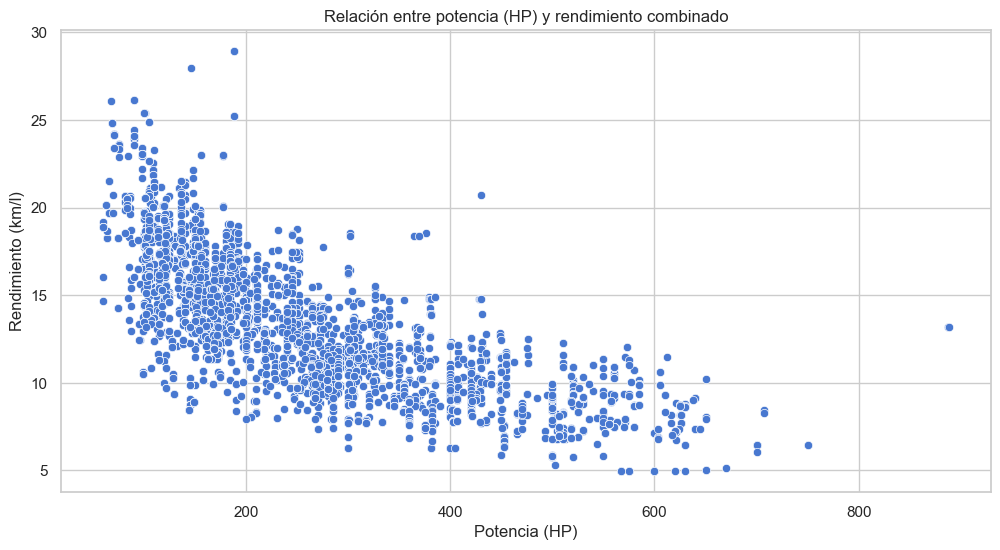

In [24]:
sns.scatterplot(x='potencia_hp', y='r_comb_kml', data=df)
plt.title('Relación entre potencia (HP) y rendimiento combinado')
plt.xlabel('Potencia (HP)')
plt.ylabel('Rendimiento (km/l)')
plt.show()


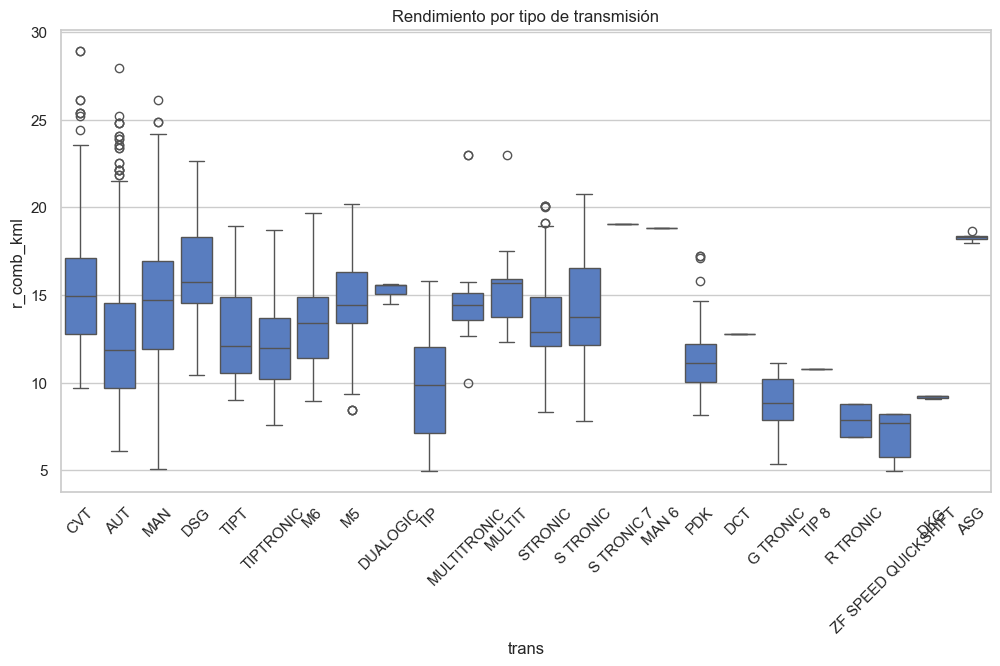

In [27]:
sns.boxplot(x='trans', y='r_comb_kml', data=df)
plt.title('Rendimiento por tipo de transmisión')
plt.xticks(rotation=45)
plt.show()


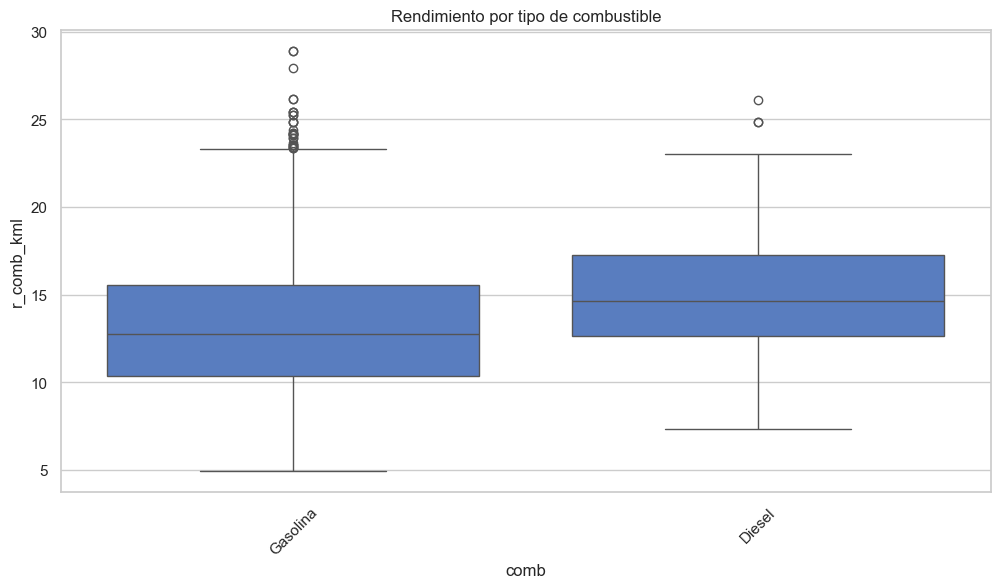

In [28]:
sns.boxplot(x='comb', y='r_comb_kml', data=df)
plt.title('Rendimiento por tipo de combustible')
plt.xticks(rotation=45)
plt.show()


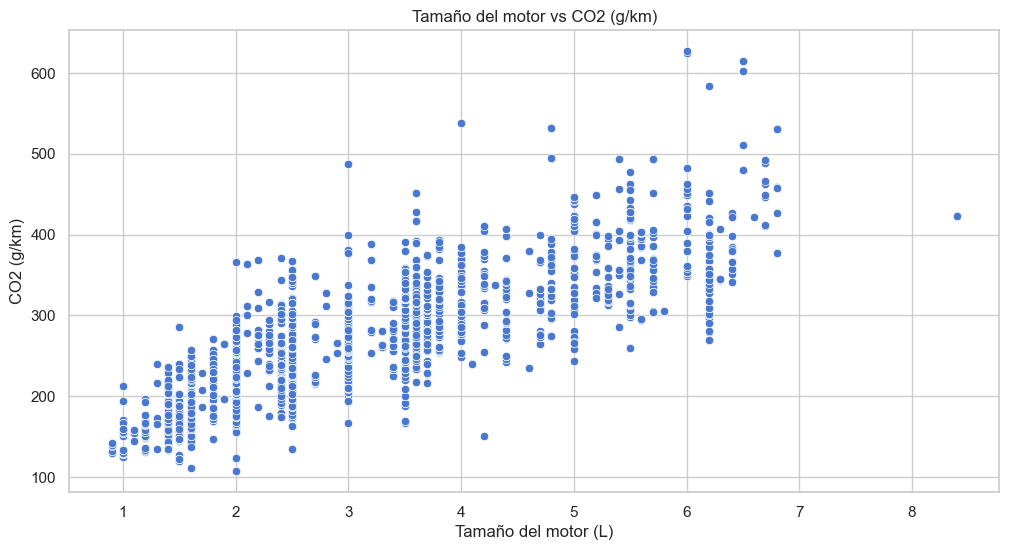

In [29]:
sns.scatterplot(x='tamano_l', y='co2gkm', data=df)
plt.title('Tamaño del motor vs CO2 (g/km)')
plt.xlabel('Tamaño del motor (L)')
plt.ylabel('CO2 (g/km)')
plt.show()


In [30]:
top_limpos = df.sort_values(['co2gkm', 'nox_g1000km']).head(10)
top_limpos[['marca', 'submarca', 'version', 'co2gkm', 'nox_g1000km']]


,marca,submarca,version,co2gkm,nox_g1000km
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),107.0,0.0
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),107.0,5.0
3365,KIA,NIRO,HIBRIDO 5PTAS 1.6L 4CIL (103+43)HP AUT DCT,111.0,11.0
6,HONDA,CIVIC,HÍBRIDO 4PTS 1.5L 4CIL 90HP CVT,119.0,7.0
7,HONDA,CIVIC,HÍBRIDO 4PTS 1.5L 4CIL 90HP CVT,119.0,7.0
726,CHEVROLET,VOLT,HIBRIDO ENCHUFABLE 4PTAS 1.5L 4CIL 101HP CVT,122.0,2.0
727,CHEVROLET,VOLT,SEDAN HIBRIDO 4PTS 1.5L 4CIL 100HP CVT,122.0,2.0
728,CHEVROLET,VOLT,SEDAN HIBRIDO 4PTAS 1.5L 4CIL 100HP CVT,122.0,2.0
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,123.0,2.0
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,123.0,2.0


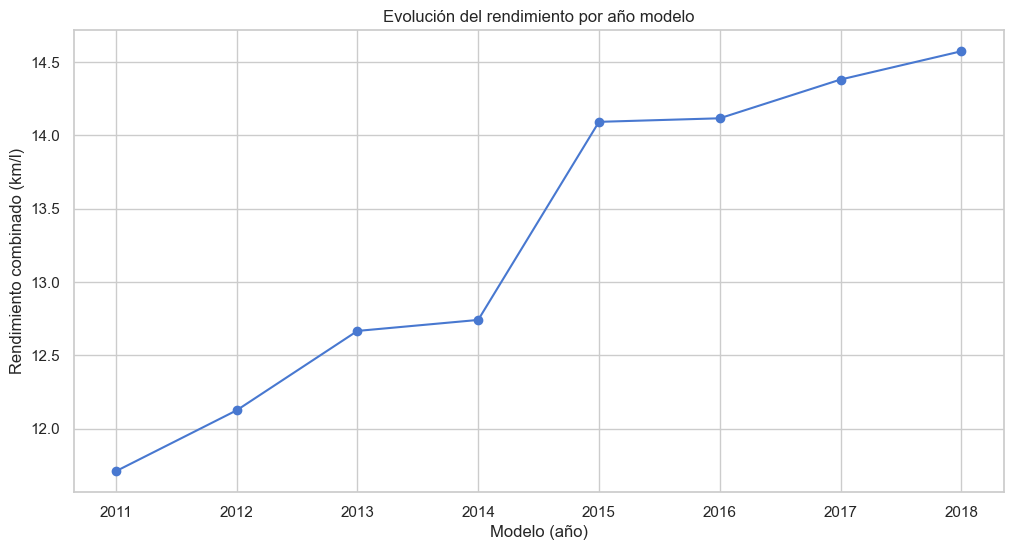

In [31]:
rendimiento_modelo = df.groupby('modelo')['r_comb_kml'].mean()
rendimiento_modelo.plot(marker='o')
plt.title('Evolución del rendimiento por año modelo')
plt.xlabel('Modelo (año)')
plt.ylabel('Rendimiento combinado (km/l)')
plt.show()


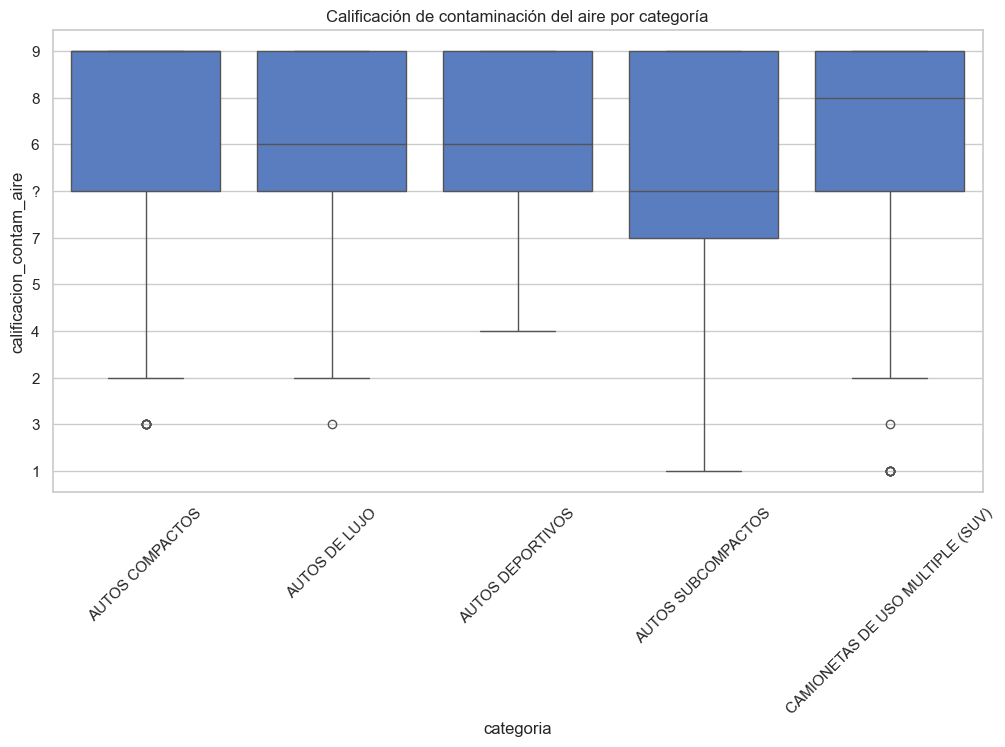

In [32]:
sns.boxplot(x='categoria', y='calificacion_contam_aire', data=df)
plt.title('Calificación de contaminación del aire por categoría')
plt.xticks(rotation=45)
plt.show()


In [33]:
mejores_vehiculos = df[
    (df['r_comb_kml'] > df['r_comb_kml'].quantile(0.75)) &
    (df['co2gkm'] < df['co2gkm'].quantile(0.25)) &
    (df['nox_g1000km'] < df['nox_g1000km'].quantile(0.25))
]

mejores_vehiculos[['marca', 'submarca', 'comb', 'trans', 'potencia_hp', 'tamano_l', 'r_comb_kml', 'co2gkm', 'nox_g1000km']]


,marca,submarca,comb,trans,potencia_hp,tamano_l,r_comb_kml,co2gkm,nox_g1000km
0,FORD,FUSION,Gasolina,CVT,188,2.0,28.93,107.0,5.0
1,FORD,FUSION,Gasolina,CVT,188,2.0,28.93,107.0,0.0
2,FORD,FUSION,Gasolina,CVT,188,2.0,25.23,123.0,2.0
3,FORD,FUSION,Gasolina,AUT,188,2.0,25.23,123.0,2.0
4,FORD,FUSION,Gasolina,CVT,156,2.5,23.01,135.0,5.0
...,...,...,...,...,...,...,...,...,...
3435,MAZDA,CX-5,Gasolina,AUT,186,2.5,16.69,186.0,5.0
3447,SUZUKI,VITARA,Gasolina,AUT,115,1.6,16.13,193.0,8.0
3479,MAZDA,CX-5,Gasolina,AUT,186,2.5,15.88,196.0,6.0
3480,MAZDA,CX-5,Gasolina,AUT,186,2.5,15.85,196.0,6.0


In [37]:
print(" Rendimiento promedio por tipo de combustible:")
print(df.groupby('comb')['r_comb_kml'].mean().sort_values(ascending=False))

print("\n Emisiones promedio de CO2 por categoría:")
print(df.groupby('categoria')['co2gkm'].mean().sort_values())

print("\n Top 5 marcas con mayor eficiencia:")
print(df.groupby('marca')['r_comb_kml'].mean().sort_values(ascending=False).head(5))

print("\n Porcentaje de autos con calificación máxima en eficiencia:")
max_calif = df['calificacion_gas_ef_inv'].max()
porc = (df['calificacion_gas_ef_inv'] == max_calif).mean() * 100
print(f"{porc:.2f}% de los vehículos tienen calificación máxima ({max_calif})")


 Rendimiento promedio por tipo de combustible:
comb
Diesel      14.794315
Gasolina    13.102505
Name: r_comb_kml, dtype: float64

 Emisiones promedio de CO2 por categoría:
categoria
AUTOS SUBCOMPACTOS                  178.539235
AUTOS COMPACTOS                     204.461003
AUTOS DEPORTIVOS                    269.016584
AUTOS DE LUJO                       270.917372
CAMIONETAS DE USO MULTIPLE (SUV)    294.606742
Name: co2gkm, dtype: float64

 Top 5 marcas con mayor eficiencia:
marca
SMART    22.464194
SEAT     17.168667
FIAT     16.169718
MINI     16.153858
KIA      15.880667
Name: r_comb_kml, dtype: float64

 Porcentaje de autos con calificación máxima en eficiencia:
0.22% de los vehículos tienen calificación máxima (10)


In [36]:
from IPython.display import Markdown

Markdown("""
### Conclusiones clave:

- **Combustibles alternativos** y motores pequeños ofrecen mejor rendimiento y menor contaminación.
- **La potencia** y el tamaño del motor están positivamente correlacionados con las emisiones.
- **Transmisión manual** tiende a ser más eficiente que la automática, aunque depende del contexto.
- Algunos **vehículos destacan por su equilibrio** entre eficiencia y bajo impacto ambiental.

Este análisis puede alimentar una estrategia de selección de modelos eficientes o guiar políticas públicas para reducción de emisiones.
""")



### Conclusiones clave:

- **Combustibles alternativos** y motores pequeños ofrecen mejor rendimiento y menor contaminación.
- **La potencia** y el tamaño del motor están positivamente correlacionados con las emisiones.
- **Transmisión manual** tiende a ser más eficiente que la automática, aunque depende del contexto.
- Algunos **vehículos destacan por su equilibrio** entre eficiencia y bajo impacto ambiental.

Este análisis puede alimentar una estrategia de selección de modelos eficientes o guiar políticas públicas para reducción de emisiones.
